In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# initialise plotly in offline mode
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import math
import numpy as np
import pylab as plt

In [13]:
def pretty_print_array(a):
	"""
	Print an array with nice line wrapping
	"""
 
	# Exercise: make it print out row and column indices, correctly aligned
 
	for i in range(len(a)):
		for j in range(len(a[i])):
			if a[i][j] == (None,None):
				print "(-, -)",
			else:
				print a[i][j],
		print
 
 
def local_distance(template_frame, test_frame):
	"""
	Compute the Euclidean distance between two feature 'vectors' (which must actually be ints)
	"""
 
	# Exercise: improve the function to accept vectors instead of scalars
 
	# sanity check, assuming we are working with ints
# 	assert type(template_frame) == type(test_frame) == int
 
	# Exercise: what sanity check would you perform when using floats?
	# Exercise: what sanity check(s) could you perform when using vectors of floats?
 
	# in one dimension, taking the square and then the square root gives the
	#  same result as taking the absolute value
	#  but we will implement it this way to make it obvious how to make the function
	#  work in higher dimensions
	return math.sqrt(  pow(template_frame - test_frame , 2)  )
 
 
def dtw(template, test):
	"""
	Perform Dynamic Time Warping between two sequences 
	"""
 
	global_distance=0
	alignment=[]
 
	# the backpointer and global_distance datastructures will have dimensions of len(template) x len (test)
	# 
	# they could be combined as an array of some class that we would have to define
	#  and that class would contain both the global distance and the backpointer for each position
 
	# Exercise: improve the datastructure along the lines suggested above
 
 
	# a data structure to hold the backpointers
	#  this is an array (implemented as a list of lists)
	# 
	# the backpointers are tuples of two values, pointing to the previous cell
	#  we will initialise them with empty values here
	backpointer=[]
	empty_backpointer=(None,None)
	for i in range(len(template)):
		this_row=[]
		for j in range(len(test)):
			this_row.append(empty_backpointer)
		backpointer.append(this_row)
 
	# Exercise: make the verbosity of the code controllable
	#  without having to comment lines such as the following out
	#  e.g., using a global variable "verbosity_level"
 
	# print "Initialised the backpointer data structure:"
	# pretty_print_array(backpointer)
 
	# a data structure to hold the shortest "global distance so far"
	#  this is an array (implemented as a list of lists) 
	global_distance=[]
	dummy_value=-1
	for i in range(len(template)):
		this_row=[]
		for j in range(len(test)):
			this_row.append(dummy_value)
		global_distance.append(this_row)
 
	# print "Initialised the global distance data structure:"
	# pretty_print_array(global_distance)
 
	# visit every position in the global distance matrix
	#  in order
	for i in range(len(template)):
		for j in range(len(test)):
 
			# deal with the edge cases first
 
			if (i==0) and (j==0):
				# this is the starting point
				# the global distance is just the local distance here
				# because there are no incoming paths
				global_distance[i][j] = local_distance( template[i], test[j] )
				backpointer[i][j] = (None,None)
 
			elif (i==0):
				# incoming paths can only come from one direction: j-1
 
				# check that the necessary previous position has already been visited
				assert global_distance[i][j-1] >= 0
 
				global_distance[i][j] = global_distance[i][j-1] + local_distance( template[i], test[j] )
				backpointer[i][j] = (i,j-1)
 
			elif (j==0):
				# incoming paths can only come from one direction: i-1
 
				# check that the necessary previous position has already been visited
				assert global_distance[i-1][j] >= 0
 
				global_distance[i][j] = global_distance[i-1][j] + local_distance( template[i], test[j] )
				backpointer[i][j] = (i-1,j)
 
 
			else:
				# the general case where paths can come from three directions
 
				# check that the necessary previous positions have already been visited
				assert global_distance[i][j-1]   >= 0
				assert global_distance[i-1][j]   >= 0
				assert global_distance[i-1][j-1] >= 0
 
 
				# this is where the Dynamic Programming happens !
 
				lowest_global_distance = global_distance[i-1][j]
				backpointer[i][j] = (i-1,j)
 
				if global_distance[i][j-1] < lowest_global_distance:
					lowest_global_distance = global_distance[i][j-1]
					backpointer[i][j] = (i,j-1)
 
				if global_distance[i-1][j-1] < lowest_global_distance:
					lowest_global_distance = global_distance[i-1][j-1]
					backpointer[i][j] = (i-1,j-1)
 
 
				global_distance[i][j] = lowest_global_distance + local_distance( template[i], test[j] )
 
 
 
	# the best possible global distance is just the value in the "last" corner of the matrix
	#  (remembering that everything is indexed from 0)
	D = global_distance[len(template)-1][len(test)-1]
 
 
	# Exercise: perform the backtracing using a recursive function instead of a while loop
 
	# now do the backtrace
	alignment=[]
 
	# start at the end - the last frame of the template aligns with the last frame of the test signal
	i,j = len(template)-1 , len(test)-1
	alignment.append( (i,j) )
 
	# only stop backtracing when BOTH i and j are 0
	#  if only ONE of them is 0, we are simply at an edge, but not the beginning
	while ( (i!=0) or (j!=0) ):
 
		alignment.append(backpointer[i][j])
		i,j = backpointer[i][j]
 
	#  reverse the alignment list so it is in the same order as the template and test signals
	#  (i.e., so that time runs forwards!)
	alignment.reverse()
 
	# return the global distance and the alignment
	return D, alignment

In [19]:
templates=[]
templates.append( np.array([3, 2, 1, 2, 3, 3, 3]) )
# templates.append( np.array([1, 1, 2, 3, 4, 3, 2]) )
test =            np.array([1, 2, 3, 2, 1])

In [21]:
"""
The main function.
Sets up some test templates and a test signal and uses DTW to compare them
"""
# hardcoded data to avoid having to load from a file

# Exercise: improve the code so that it will handle sequences of vectors, such as
# templates=[]
# templates.append( [ [3,3,2], [2,1,2], [1,2,2], [2,2,3] ] )
# templates.append( [ [1,1,1], [1,1,2], [2,2,3], [3,2,4], [4,1,5] ] )
# test =            [ [1,1,2], [2,2,4], [3,3,4], [2,4,3] ]

# Exercise: add the ability to load the templates and the test signal from files

aln = []
for t in templates:
    D, alignment = dtw(t, test)
    print "Distance from template",t,"to test",test,"is", D

    for (i,j) in alignment:
        print "Alignment",(i,j),": ",t[i]," aligns with", test[j]
        aln.append(test[j])

Distance from template [3 2 1 2 3 3 3] to test [1 2 3 2 1] is 6.0
Alignment (0, 0) :  3  aligns with 1
Alignment (1, 1) :  2  aligns with 2
Alignment (2, 1) :  1  aligns with 2
Alignment (3, 1) :  2  aligns with 2
Alignment (4, 2) :  3  aligns with 3
Alignment (5, 2) :  3  aligns with 3
Alignment (6, 2) :  3  aligns with 3
Alignment (6, 3) :  3  aligns with 2
Alignment (6, 4) :  3  aligns with 1


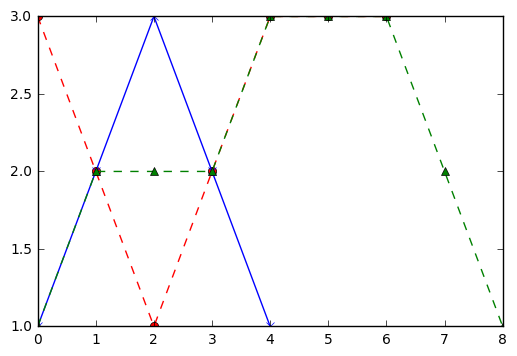

In [29]:
plt.plot(templates[0], 'ro--')
# plt.plot(templates[1])
plt.plot(test, 'bx-')
plt.plot(aln, 'g^--')